# ***Salary Classification and Prediction using Logistic Regression & Decision Tree Classifier***

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

# Data Visualization

In [ ]:
df = pd.read_csv('adult.csv', sep=',')
df[df == '?'] = np.nan
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


**Count of salaries <=50K and >50K**

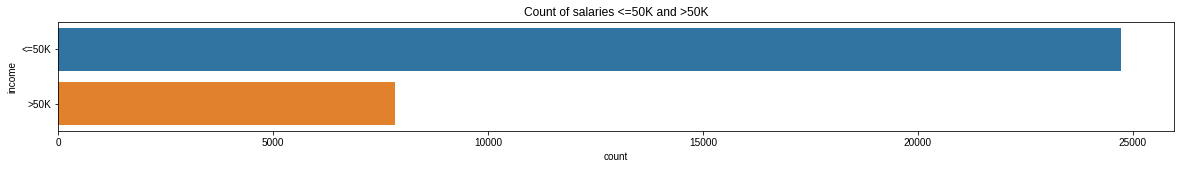

In [ ]:
fig = plt.figure(figsize=(20,2))
plt.title("Count of salaries <=50K and >50K")
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=df)

**EDUCATION**

In [ ]:
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [ ]:
df[['education', 'education.num']].groupby(['education'], as_index=False).mean().sort_values(by='education.num', ascending=False)

,education,education.num
2,Doctorate,16.000000
4,Masters,14.250544
0,Bachelors,13.000000
1,CommunityCollege,10.360986
3,HighGrad,9.000000
5,dropout,5.602398


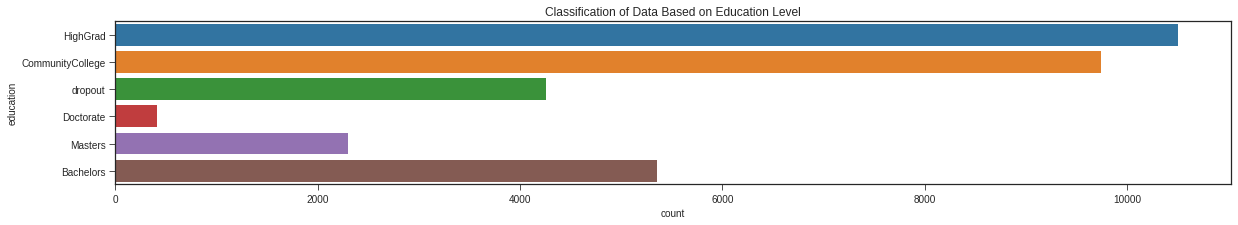

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.title("Classification of Data Based on Education Level")
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=df)

**MARITAL STATUS**

In [ ]:
df['marital.status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital.status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital.status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital.status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital.status'].replace(['Separated'], 'Separated',inplace=True)
df['marital.status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital.status'].replace(['Widowed'], 'Widowed',inplace=True)

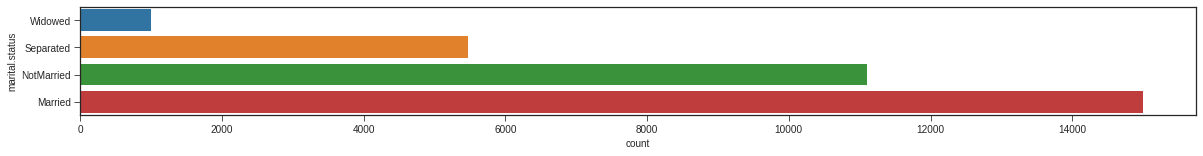

In [ ]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital.status", data=df)

**OCCUPATION**

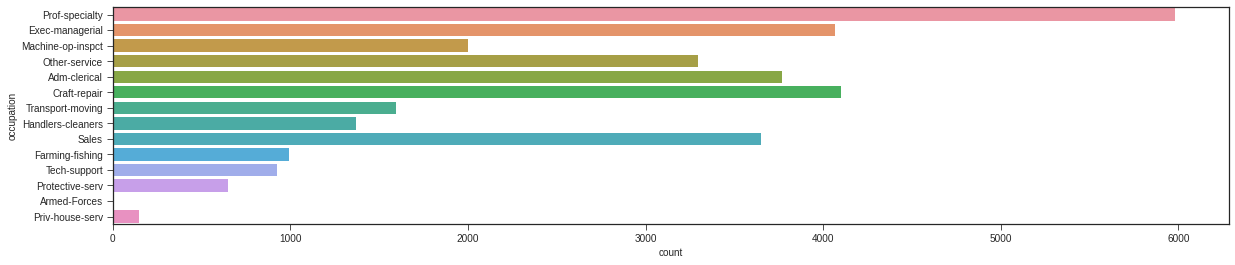

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=df)

**TYPES OF WORK-CLASS**

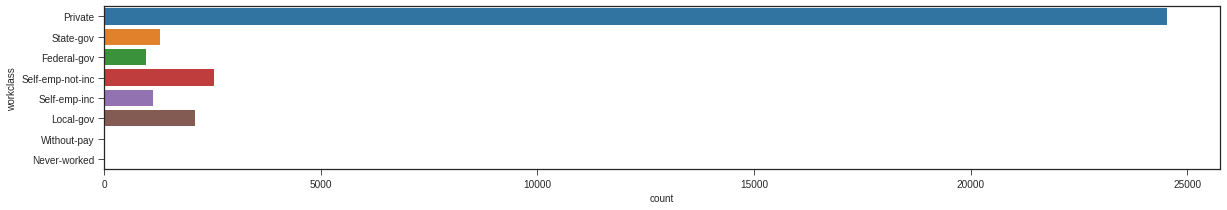

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=df)

**AGE**

In [ ]:
df['age_bin'] = pd.cut(df['age'], 20)

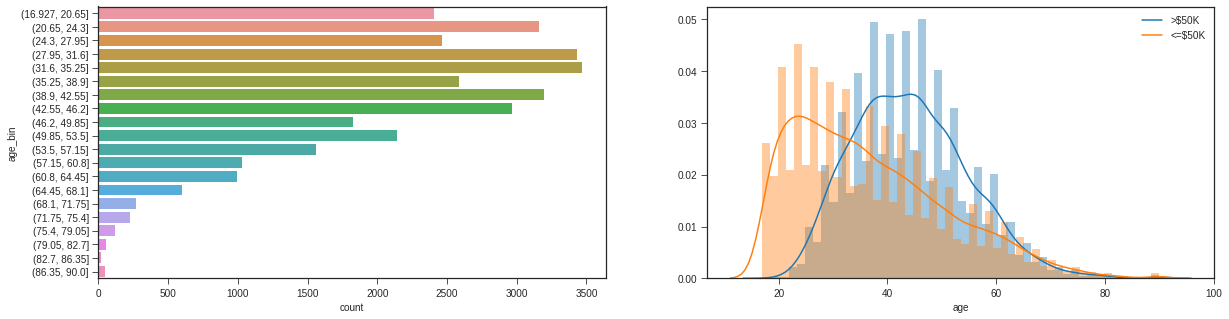

In [ ]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=df)
plt.subplot(1, 2, 2)
sns.distplot(df[df['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

#LOGISTIC REGRESSION

## Data Preprocessing


### Importing Dataset

In [ ]:
df = pd.read_csv('adult.csv', sep=',')

### Taking care of missing data

In [ ]:
#Given dataset contains "?" instead of "NaN". So replacing "?" with "NaN"
df[df == '?'] = np.nan

In [ ]:
# Filling missing values with Mode of the columns
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
#Checking for Null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Encoding Dependent Variable

In [ ]:
#Income
y = df.iloc[:, -1]

In [ ]:
print(y)

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object


In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 0 0 ... 1 0 0]


Dropping Useless Columns

In [ ]:
df = df.drop(['income','fnlwgt','capital.gain','capital.loss','native.country'], axis=1)

In [ ]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,40
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,40
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40


### Encoding Independent Variables

In [ ]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']) 

In [ ]:
df.head()

,age,education.num,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,90,9,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,82,9,18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,66,10,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,54,4,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,41,10,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [ ]:
X = df.iloc[:, :]

In [ ]:
print(X)

       age  education.num  hours.per.week  ...  race_White  sex_Female  sex_Male
0       90              9              40  ...           1           1         0
1       82              9              18  ...           1           1         0
2       66             10              40  ...           0           1         0
3       54              4              40  ...           1           1         0
4       41             10              40  ...           1           1         0
...    ...            ...             ...  ...         ...         ...       ...
32556   22             10              40  ...           1           0         1
32557   27             12              38  ...           1           1         0
32558   40              9              40  ...           1           0         1
32559   58              9              40  ...           1           1         0
32560   22              9              20  ...           1           0         1

[32561 rows x 61 columns]


### Feature Scaling (Only required for Logistic Regression)

**Standardization**
x_stand = (x - mean(x)) / std_dev(x)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)  

In [ ]:
print(X)

[[ 3.76961234 -0.42005962 -0.03542945 ...  0.4130197   1.42233076
  -1.42233076]
 [ 3.18311167 -0.42005962 -1.81720429 ...  0.4130197   1.42233076
  -1.42233076]
 [ 2.01011032 -0.03136003 -0.03542945 ... -2.421192    1.42233076
  -1.42233076]
 ...
 [ 0.10398314 -0.42005962 -0.03542945 ...  0.4130197  -0.70307135
   0.70307135]
 [ 1.42360965 -0.42005962 -0.03542945 ...  0.4130197   1.42233076
  -1.42233076]
 [-1.21564337 -0.42005962 -1.65522476 ...  0.4130197  -0.70307135
   0.70307135]]


## Splitting the dataset into the Training set and Test set (70/30)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(x_train)

[[ 0.10398314  1.13473876 -1.65522476 ...  0.4130197   1.42233076
  -1.42233076]
 [ 0.03067056 -0.42005962 -0.19740898 ...  0.4130197  -0.70307135
   0.70307135]
 [ 0.25060831 -0.03136003 -0.03542945 ...  0.4130197   1.42233076
  -1.42233076]
 ...
 [-0.92239303 -0.80875922  0.85545798 ... -2.421192   -0.70307135
   0.70307135]
 [ 0.39723348  1.52343836 -0.03542945 ...  0.4130197  -0.70307135
   0.70307135]
 [ 0.03067056 -0.42005962 -0.03542945 ...  0.4130197  -0.70307135
   0.70307135]]


In [ ]:
print(x_test)

[[ 1.27698448 -1.97485801 -0.03542945 ...  0.4130197   1.42233076
  -1.42233076]
 [-1.43558112 -0.42005962 -1.25027593 ...  0.4130197   1.42233076
  -1.42233076]
 [-1.14233079 -0.03136003 -0.44037828 ... -2.421192    1.42233076
  -1.42233076]
 ...
 [-0.99570562 -0.03136003 -0.03542945 ...  0.4130197  -0.70307135
   0.70307135]
 [-0.33589236 -0.42005962  0.61248868 ... -2.421192    1.42233076
  -1.42233076]
 [ 0.83710898  0.35733957  0.77446821 ...  0.4130197  -0.70307135
   0.70307135]]


In [ ]:
print(y_train)

[0 1 0 ... 0 1 1]


In [ ]:
print(y_test)

[0 0 0 ... 0 0 1]


### Building model

In [ ]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [ ]:
print(y_pred)

[0 0 0 ... 0 0 1]


### Accuracy

In [ ]:
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8292


## Splitting the dataset into the Training set and Test set (60/40)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

### Building Model

In [ ]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

### Accuracy

In [ ]:
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8310


# DECISION TREE CLASSIFIER

## Data Preprocessing

In [ ]:
df = pd.read_csv('adult.csv', sep=',')

### Taking care of missing data

In [ ]:
#Given dataset contains "?" instead of "NaN". So replacing "?" with "NaN"
df[df == '?'] = np.nan

In [ ]:
# Filling missing values with Mode of the columns
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
#Checking for Null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Encoding Dependent Variable

In [ ]:
#Income
y = df.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 0 0 ... 1 0 0]


### Dropping Useless Columns

In [ ]:
df = df.drop(['income','fnlwgt','capital.gain','capital.loss','native.country'], axis=1)

In [ ]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,40
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,40
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40


### Encoding Independent Variables

In [ ]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])

In [ ]:
X = df.iloc[:, :]

## Splitting the dataset into the Training set and Test set (70/30)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(x_train)

       age  education.num  hours.per.week  ...  race_White  sex_Female  sex_Male
32098   40             13              20  ...           1           1         0
25206   39              9              38  ...           1           0         1
23491   42             10              40  ...           1           1         0
12367   27              9              40  ...           1           0         1
7054    38             14              40  ...           1           0         1
...    ...            ...             ...  ...         ...         ...       ...
13123   90             10              40  ...           1           0         1
19648   36              9              40  ...           1           0         1
9845    26              8              51  ...           0           0         1
10799   44             14              40  ...           1           0         1
2732    39              9              40  ...           1           0         1

[22792 rows x 61 columns]


In [ ]:
print(x_test)

       age  education.num  hours.per.week  ...  race_White  sex_Female  sex_Male
22278   56              5              40  ...           1           1         0
8950    19              9              25  ...           1           1         0
7838    23             10              35  ...           0           1         0
16505   37             13              40  ...           1           0         1
19140   49             14              50  ...           1           0         1
...    ...            ...             ...  ...         ...         ...       ...
21949   37              9              50  ...           1           0         1
26405   26              9              40  ...           1           0         1
23236   25             10              40  ...           1           0         1
26823   34              9              48  ...           0           1         0
20721   50             11              50  ...           1           0         1

[9769 rows x 61 columns]


In [ ]:
print(y_train)

[0 1 0 ... 0 1 1]


In [ ]:
print(y_test)

[0 0 0 ... 0 0 1]


### Selecting Depth of Decision Tree

In [ ]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, X, y, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.76 (+/- 0.00)
Max depth: 2, Accuracy: 0.82 (+/- 0.02)
Max depth: 3, Accuracy: 0.82 (+/- 0.02)
Max depth: 4, Accuracy: 0.82 (+/- 0.02)
Max depth: 5, Accuracy: 0.82 (+/- 0.02)
Max depth: 6, Accuracy: 0.83 (+/- 0.01)
Max depth: 7, Accuracy: 0.83 (+/- 0.01)
Max depth: 8, Accuracy: 0.83 (+/- 0.01)
Max depth: 9, Accuracy: 0.83 (+/- 0.01)
Max depth: 10, Accuracy: 0.83 (+/- 0.01)
Max depth: 11, Accuracy: 0.83 (+/- 0.01)
Max depth: 12, Accuracy: 0.82 (+/- 0.01)
Max depth: 13, Accuracy: 0.82 (+/- 0.01)
Max depth: 14, Accuracy: 0.82 (+/- 0.00)
Max depth: 15, Accuracy: 0.81 (+/- 0.01)
Max depth: 16, Accuracy: 0.81 (+/- 0.01)
Max depth: 17, Accuracy: 0.81 (+/- 0.01)
Max depth: 18, Accuracy: 0.80 (+/- 0.01)
Max depth: 19, Accuracy: 0.80 (+/- 0.01)


Building model

In [ ]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
classifier = classifier.fit(x_train, y_train)

Visualization of Decision Tree for the created model

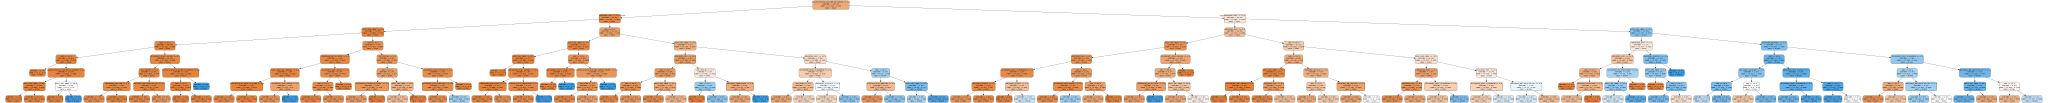

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(x_train), class_names=['lt50K', 'gt50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

### Accuracy

In [ ]:
classifier.score(x_test, y_test)
print('Decision Tree Classifier accuracy score with all the features for (70/30): {0:0.4f}'. format(classifier.score(x_test, y_test)))

Decision Tree Classifier accuracy score with all the features for (70/30): 0.8315


## Splitting the dataset into the Training set and Test set (60/40)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

### Building Model

In [ ]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
classifier = classifier.fit(x_train, y_train)

### Accuracy

In [ ]:
classifier.score(x_test, y_test)
print('Decision Tree Classifier accuracy score with all the features for (60/40): {0:0.4f}'. format(classifier.score(x_test, y_test)))

Decision Tree Classifier accuracy score with all the features for (60/40): 0.8257


# Accuracy comparision between Logistic Regression and Decision Tree Classifier

| Model | Data Set Split | Accuracy |
| --- | --- | --- |
| Logistic Regression | 70/30  | .8292 |
| Logistic Regression | 60/40 | .8299 |
| Decision Tree | 70/30  | .8315 |
| Decision Tree | 60/30  | .8259 |
